<a href="https://colab.research.google.com/github/piyush02nir/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#20B2AA"> <h1>**Retail Sales Prediction**</h1></font><hr color="grey">

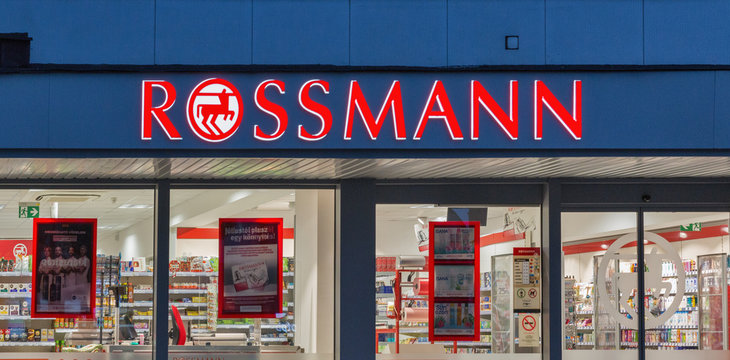

<font color="#20B2AA"> <h3><b>Business Context</b></h3><hr color="grey"></font>
<font color="#20B2AA">**Rossmann operates over 3,000 drug stores in 7 European countries**.</font> Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for <font color="#20B2AA">**1,115 Rossmann stores**.</font> The task is to <font color="#20B2AA">**forecast the "Sales" column for the test set**</font>. Note that some stores in the dataset were temporarily closed for refurbishment.<hr color="grey">

<font color="#20B2AA"> <h3><b>Data Description</b></h3><hr color="grey"></font>
We have been provided with 2 data sets.
####<font color="#20B2AA">**1) Rosemann store Data**:</font> Information about sales and related factors<br>



*   <font color="#20B2AA">**Store**:</font> Unique Store Id.
*   <font color="#20B2AA">**DayOfWeek**:</font> No. of day of the week.
*   <font color="#20B2AA">**Date**:</font> current Date of the day.
*   <font color="#20B2AA">**Sales**:</font> no. of sales of the day.
*   <font color="#20B2AA">**Customers**:</font> footfall of the day.
*   <font color="#20B2AA">**Open**:</font> store is open or closed.
*   <font color="#20B2AA">**Promo**:</font> Store running promotion or not.
*   <font color="#20B2AA">**StateHoliday**:</font> state holiday or not.
*   <font color="#20B2AA">**SchoolHoliday**:</font> school holiday or not.

####<font color="#20B2AA">**2) Store**:</font> Information about the store
*   <font color="#20B2AA">**Store**:</font> Unique Store Id.
*   <font color="#20B2AA">**StoreType**:</font> 4 different type of stores a,b,c,d.
*   <font color="#20B2AA">**Assortment**:</font> A collection of goods or services that a business provides to a consumer.
*   <font color="#20B2AA">**CompetitionDistance**:</font>	distance in meters to the nearest competitor store.
*   <font color="#20B2AA">**CompetitionOpenSinceMonth**:</font> Month in which the competition store was open.
*   <font color="#20B2AA">**CompetitionOpenSinceYear**:</font> Year in which the competition store was open.
*   <font color="#20B2AA">**Promo2**:</font> Store running consecutive promotion or not.
*   <font color="#20B2AA">**Promo2SinceWeek**:</font>	 calendar week when the store started participating in Promo2.
*   <font color="#20B2AA">**Promo2SinceYear**:</font>	year when the store started participating in Promo2.
*   <font color="#20B2AA">**PromoInterval**:</font>The month in which the promotion starts eg: Jan,Apr,Jul,Oct.

<hr color="grey">


## <font color = "#20B2AA">**Following are the 7 major steps of building Machine Learning Model :**
1. **Collecting Data.**
2. **Preparing the Data.**
   
    * **Exploratory Data Analysis.**

    * **Feature engineering.**
3. **Choosing a Model.**
4. **Training the Model.**
5. **Evaluating the Model.**
6. **Parameter Tuning.**
7. **Making Predictions.**

#<font color = "#20B2AA"><font color = "#20B2AA">**First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model.**

### **Following are the libraries used:**

* **NumPy**
* **Pandas**
* **Matplotlib**
* **Seaborn**
* **Scikit Learn**

### <font color = "#20B2AA"><b>Importing all required libraries and setting Jupyter Notebook</b>

In [ ]:
#Importing required libraries for EDA
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys, math

# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor


In [ ]:
#Noting the starting time of the code execution.
t1 = time.time()

#setting the notebook.
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


<hr color="grey">

### <font color = "#20B2AA">**Loading csv files for Rossmann Stores and Store into a DataFrame**

In [ ]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<font color = "#20B2AA">**1.Collecting Data.**

## **After mounting the google drive we are ready to load our dataset.**

we have two dataset. Which is Rossmann Store data and Store data. In which we have diffrent store observations and its some information like sales store catagories etc.

In [ ]:
#path of the required csv files.
df_rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/Rossmann Stores Data.csv')

df_store = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/store.csv')

In [ ]:
#Shivank
# df_rossmann = pd.read_csv('/content/drive/MyDrive/retail sales data/Rossmann Stores Data.csv')

# df_store = pd.read_csv('/content/drive/MyDrive/retail sales data/store (3).csv')

<hr color="grey">

# <font color = "#20B2AA">**2.Preparing the Data**

Now looking at the data for the first time and checking the shape of our DataFrames which helps us to get an idea to know the number of rows and columns present in our Rossmann DataFrames.

Using info() method we can easily get the idea of what kind of data type and null values inside our Rossman dataframes we have.

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rossmann.head()            #checking 1st 5 rows of the df

print('\n------------------------------------Tail---------------------------------------\n')
df_rossmann.tail()            #checking last 5 rows of the df

print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rossmann.shape[0]}, Columns: {df_rossmann.shape[1]}\n')  

print('------------------------------------Info--------------------------------------\n')
df_rossmann.info()            #information about the df

print('\n------------------------------------describe--------------------------------------\n')
df_rossmann.describe()        #statictical description of the df

print('\n------------------------------------NUll_Value_count--------------------------------------\n')
df_rossmann.isnull().sum()    #sum of the null values

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 9

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

------------------------------------describe--------------------------------------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



------------------------------------NUll_Value_count--------------------------------------



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The Rossmann_df has 1017209 number of rows and 9 columns.


<font color="#20B2AA"><h3>**The data has no null values**</h3>

In [ ]:
#As date column is in object format converting it into Date Time format.
df_rossmann['Date'] = pd.DatetimeIndex(df_rossmann['Date'])

In [ ]:
#as StateHoliday column is in object lets check its unique values 
df_rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
#replacing string '0' with int 0
df_rossmann['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#checking the data
df_rossmann.iloc[1113:1118] #Store no. repeats on every new date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1116,2,4,2015-07-30,5567,601,1,1,0,1
1117,3,4,2015-07-30,8977,823,1,1,0,1


In [ ]:
#counting data for no. of days
val = (df_rossmann['Store'] == 1).sum()

print(f'Total no. of days in the data set are: {val} days')

Total no. of days in the data set are: 942 days


In [ ]:
# Checking if any dates are missing
df_rossmann['Date'].iloc[0] - df_rossmann['Date'].iloc[-1] #last date is not included 

Timedelta('941 days 00:00:00')

<font color = "#20B2AA"><h4>**No dates are missing in the data**</h4>

In [ ]:
#check the no of the days the store remains closed
val = ((df_rossmann['Open'] == 0 ) & (df_rossmann['Store'] == 1)).sum()

print(f'Total no. of days store remain closed: {val} days')

Total no. of days store remain closed: 161 days


In [ ]:
#seeing max values of sales and customers.
val_1,val_2 = df_rossmann['Sales'].max(),df_rossmann['Customers'].max()

print(f'Maximum sales recorded: {val_1},\nMaxmimum customers recorded: {val_2}')

Maximum sales recorded: 41551,
Maxmimum customers recorded: 7388


In [ ]:
#seeing unique wales for stateholiday and schoolholiday
df_rossmann['StateHoliday'].unique()

print('\n---')

df_rossmann['SchoolHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)


---


array([1, 0])

### <font color = "#20B2AA">**Outliers detection** </font>

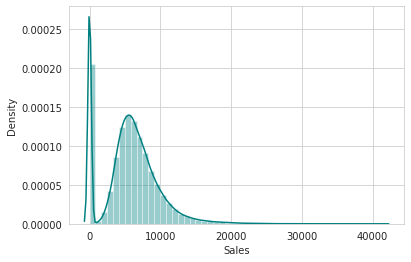

In [ ]:
#checking the distribution plot of the sales column.
sns.distplot(df_rossmann['Sales'].astype(np.int64), color = "teal")

There are days when the stores are closed, including state holidays and school holidays, thus there is a high density of data at 0 sales.

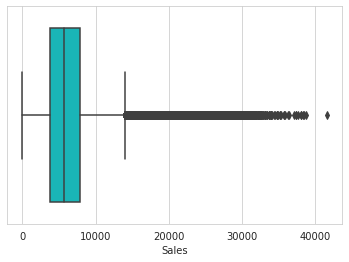

In [ ]:
#checking the box plot of the sales column.
sns.boxplot(df_rossmann['Sales'].astype(np.int64), color = "#00CED1")

The boxplot above displays the interquartile range, which is roughly between 4,000 and 7,000, as well as a significant number of outliers, ranging from 14,000 to as high as 42,000.

In [ ]:
#statistical values to understand data.
val1 = df_rossmann['Sales'].mean()
val2 = df_rossmann['Sales'].median()
val3 = df_rossmann['Sales'].mode()

print(f'For the sales column:\nMean: {val}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 161
Median: 5744.0
Mode: 0    0
dtype: int64


<font color = "#20B2AA"><h3> **Observations:**</h3></font>
*  <font color = "#20B2AA"><h3> **Distribution plot for sales column**:</font>

  1. Sales which shows 0 observation is the part where stores were <font color = "#20B2AA">**closed due to holidays or for refurbishment**.</font>
  2.   Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "#20B2AA">**right skewed**.</font>

*  <font color = "#20B2AA"><h3> **Box plot for sales column**:</font>

  1.   Maximum Data lies between the <font color = "#20B2AA">**100% quertile range of 0 - 14,000**.</font>
  2.   Outliers are seen after <font color = "#20B2AA">**14,000.**

*   <font color = "#20B2AA">**Outliers will not be removed now as the zero sales looks important for further EDA**.</font>

*   The Mean median and mode will change when the 0 sales figures and outliers will be removed. 














<hr color="grey">

## <font color = "#20B2AA">**Checking data for the store**
Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our Rossmann DataFrames.

Using info() method we can easily get the idea of what kind of data type and null values inside our Rossman dataframes we have.

In [ ]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df

print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df

print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')

print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df

print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df

print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The Store_df has 1115 number of rows and 10 column.

### <font color = "#20B2AA">**Null Values Treatment**

In [ ]:
#check the persentage of null values in each column.
(df_store.isnull().sum() / len(df_store) ) * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

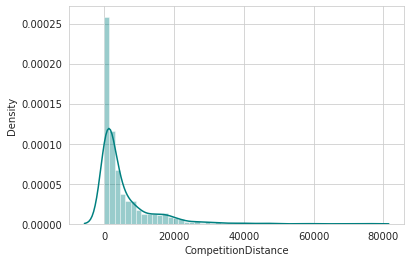

In [ ]:
#find distribution the dataset
sns.distplot(df_store['CompetitionDistance'], color = "teal")

<font color = "#20B2AA"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "#20B2AA">**right skewed**.</font>
*   So, the <font color = "#20B2AA">**Median values will be used to fill the missing values**.</font>



In [ ]:
#check if promo2 is open and week and year are missing
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceYear'].isnull())].count()

print('\n------')

df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceWeek'].isnull())].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


------


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### **No missing data found**

In [ ]:
# filling competition distance with the median value
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [ ]:
# checking if competition dicsance is zero due to error in data preparation. 
df_store[(df_store['CompetitionDistance'] == 0.0)].shape[0] / 1115

0.0

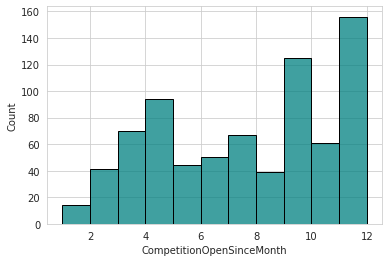

In [ ]:
#plot which month has most competition
sns.histplot(df_store['CompetitionOpenSinceMonth'].sort_values(), color = 'Teal', edgecolor = 'black')

In [ ]:
#check the unique values in CompetitionOpenSinceMonth.
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])



*   <font color = "#20B2AA">**CompetitionOpenSinceMonth:**</font> As the dataset contains only 12 values of the month the <font color = "#20B2AA">**Mode Value will be used to fill the missing values.**</font>
*  <font color = "#20B2AA">**CompetitionOpenSinceYear:**</font>As the dataset contains values of the year the <font color = "#20B2AA">**Mode Value will be used to fill the missing values.**







In [ ]:
#find mode of the 2 columns
val1,val2 = df_store['CompetitionOpenSinceMonth'].mode()[0],df_store['CompetitionOpenSinceYear'].mode()[0]

print(f'Mode for CompetitionOpenSinceMonth: {val1} \nMode for CompetitionOpenSinceYear: {val2}  ')

Mode for CompetitionOpenSinceMonth: 9.0 
Mode for CompetitionOpenSinceYear: 2013.0  


In [ ]:
# filling competition open since month and year with modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(val1, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(val2, inplace = True)

When the promo2 is zero the Promo2SinceWeek,Promo2SinceYear, PromoInterval can be seen to be NaN.<br>
<font color = "#20B2AA">**Therefore, replacing NaN values with 0.**

In [ ]:
# inputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)     

In [ ]:
#check
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<hr color="grey">

##  <font color = "#20B2AA">**Mergeing the two DataFrames**

In [ ]:
#merging the store data on rossmann using right join on store column
df_rms = pd.merge(df_rossmann,df_store, how='inner', on = 'Store') #rms = rossmann Stores

In [ ]:
#check the merged dataframe 

print('------------------------------------Head---------------------------------------\n')
df_rms.head()               #checking 1st 5 rows of the df

print('\n------------------------------------Tail---------------------------------------\n')
df_rms.tail()               #checking last 5 rows of the df

print('\n------------------------------------Shape-------------------------------------\n')
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n') #no. of rows and columns

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



Now we have 1017209 numner of rows and 18 columns.

In [ ]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)

#cheking if any data is missing after the above operations.
print('------------------------------------Head---------------------------------------\n')
df_rms.head(10)#first 3 rows of the df

print('\n------------------------------------Shape-------------------------------------\n')

                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



first we have date column we have to separate the date, month and year from that.

In [ ]:
#Getting day from the Date column
df_rms['DayOfYear'] = df_rms['Date'].dt.dayofyear

#Getting week from the Date column
df_rms['WeekOfYear'] = df_rms['Date'].dt.weekofyear

#Getting month from the Date column
df_rms['Month'] = df_rms['Date'].dt.month

#Getting year from the Date column
df_rms['Year'] = df_rms['Date'].dt.year

## <font color = "#20B2AA"> **Knowing the categorical columns.**
  Checking the count of the following . 
*   <font color = "#20B2AA">**Assortment**</font>
  *   <font color = "#20B2AA">**a:**</font> basic
  *   <font color = "#20B2AA">**b:**</font> extra
  *   <font color = "#20B2AA">**c:**</font> extended



*   <font color = "#20B2AA">**StoreType**</font> 
  *   <font color = "#20B2AA">**a:**</font> small store_type.
  *   <font color = "#20B2AA">**b:**</font> medium store_type.
  *   <font color = "#20B2AA">**c:**</font> large store_type.
  *   <font color = "#20B2AA">**d:**</font> huge store_type.

*   <font color = "#20B2AA">**StateHoliday**</font> 
  *   <font color = "#20B2AA">**a:**</font> public holiday
  *   <font color = "#20B2AA">**b:**</font> Easter holiday
  *   <font color = "#20B2AA">**c:**</font> Christmas
  *   <font color = "#20B2AA">**0:**</font> None





In [ ]:
#check the count of the type of assortment
print('Assortment')
df_rms['Assortment'].value_counts()

#check the count of the type of Storetype
print('\n\nStore Type')
df_rms['StoreType'].value_counts()

#check the count of the type of StateHoliday
print('\n\nState Holiday')
df_rms['StateHoliday'].value_counts()

Assortment


a    537445
c    471470
b      8294
Name: Assortment, dtype: int64



Store Type


a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64



State Holiday


0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64





<font color = "#20B2AA">**As per domain knowledge:**

*   Categorical columns like <font color = "#20B2AA">**Assortment**</font> and <font color = "#20B2AA">**StoreType**</font> will be replaced by dummy variables after EDA.

*   <font color = "#20B2AA">**StateHoliday**</font> will be converted into 0 and 1 taking 1 as all the variables with holiday.









In [ ]:
##converting catagorical value into interger values based on StateHoliday class.
df_rms["StateHoliday"] = df_rms["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

As we can see that many columns are in object datatype so we have to check the datatype of these column because our machine learning algorithms only takes numberical values.

In [ ]:
#converting object dtype to integer.
df_rms['StateHoliday']= df_rms['StateHoliday'].astype(int)

##<font color = "#20B2AA">**Exploratry Data Analysis**


*   Exploratory data analysis (EDA) is a process of analyzing and summarizing a dataset in order to better understand its properties and characteristics.
*   It is an iterative process that involves visualizing and summarizing the data, identifying patterns and relationships, and testing hypotheses about the data.
*   It helps researchers to gain insights into the data, identify potential issues or problems, and formulate hypotheses that can be tested through further analysis.
*   EDA is typically done using statistical and visualization techniques, such as histograms, scatter plots, and box plots, and often involves the use of software tools such as R or Python.


 


## <font color = "#20B2AA">**Hypothesis Testing**


*   Sales should be highest on saturday or sundays due to weekends.
*   sales should have a positive effect after promo.
*   Store store B should have lest sales as it have lest no. of stores.
*   The month of december should have highest no. of sales as it has most no. of public holidays.
*   If the compition distance is close to each other than it should increase the overall sales.







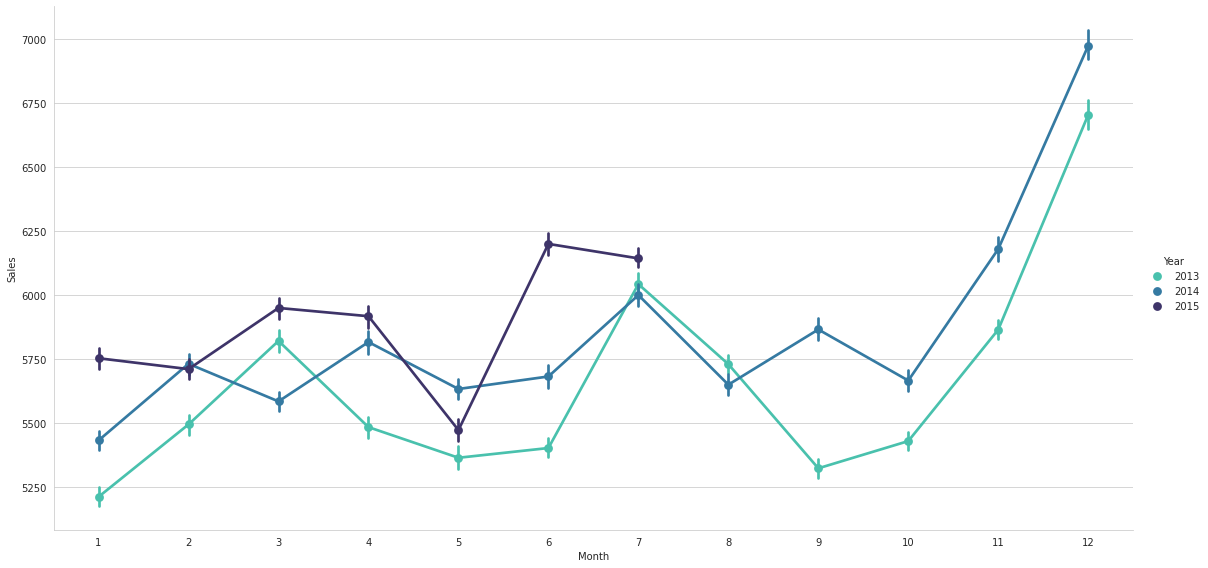

In [ ]:
#monthly sales of every year
sns.catplot( data=df_rms,x="Month", y="Sales", hue="Year", style="Year",kind="point",palette="mako_r", size=8,aspect=2)

###<font color = "#20B2AA">**Obesrvation**:


*   Here the  trend shows that the sales increase significantly in the month of October to December due to the holiday season.
*   From the chart we can see that there Are roughly 3 cycle of sales.



[Text(0.5, 1.0, 'Sales according to year ')]

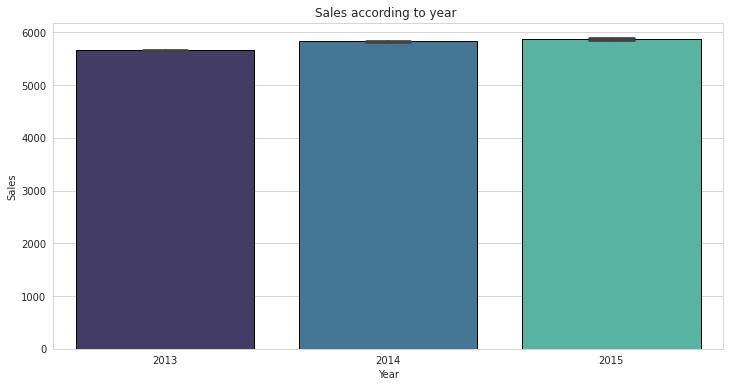

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6)) #setting the figure size

#ploting barplot using year and sales column
year_sales = sns.barplot(data=df_rms,x='Year',y='Sales',palette = "mako",edgecolor = 'black',ax = ax, capsize = .2)
ax.set(title = 'Sales according to year ') #setting title
plt.show()


### <font color = "#20B2AA">**Observation:**

*   From above chart we can see that there is YoY increase in sales from 2013-2015

* Despite having data available for  7 months in year 2015.It has already crossed the sales of 2014.   





### <font color = "#20B2AA">Week day sales

Text(-0.25, 7170, '\n7170')

Text(0.7500000000000001, 1703, '\n1703')

Text(1.75, 3729, '\n3729')

Text(2.7499999999999996, 11201, '\n11201')

Text(3.7499999999999996, 7205, '\n7205')

Text(4.75, 672, '\n672')

Text(5.75, 141137, '\n141137')

Text(0.14999999999999997, 137560, '\n137560')

Text(1.15, 143961, '\n143961')

Text(2.15, 141936, '\n141936')

Text(3.15, 134644, '\n134644')

Text(4.15, 138640, '\n138640')

Text(5.15, 144058, '\n144058')

Text(6.15, 3593, '\n3593')

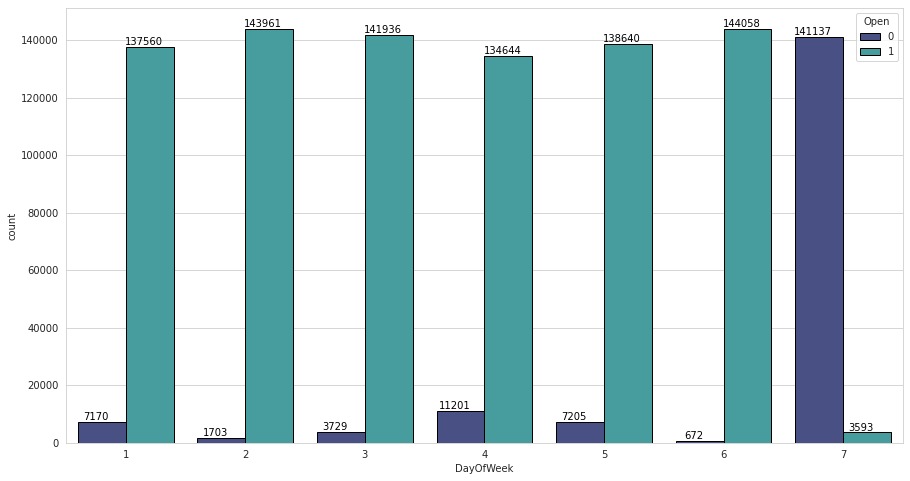

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))  #setting the figure size

#making a count plot of days of week and open columns
count = sns.countplot(x = 'DayOfWeek',hue = 'Open', data = df_rms, palette="mako", edgecolor = 'black')

#to get the values of the bars 
for p in count.patches: #looping through the patches so that we can print values in the chart.
  count.annotate(f'\n{round(p.get_height(),2)}', (p.get_x() + 0.15, p.get_height()), ha = 'center', va = 'bottom', color = 'Black', size = 10)

### <font color = "#20B2AA">**Observation:**


*   This plot shows open and close of the shop on days of the week.
*   Here, the store in open for maximum no. of days on Saturday and minimum no. of days Sunday. 



[Text(0.5, 1.0, 'Sales according to Day of week ')]

Text(-0.25, 7809.044510467767, '\n7809.04')

Text(0.75, 7005.244466717926, '\n7005.24')

Text(1.75, 6555.884138262451, '\n6555.88')

Text(2.75, 6247.57591278412, '\n6247.58')

Text(3.75, 6723.27430491275, '\n6723.27')

Text(4.75, 5847.562599322877, '\n5847.56')

Text(5.75, 204.18318938713466, '\n204.18')

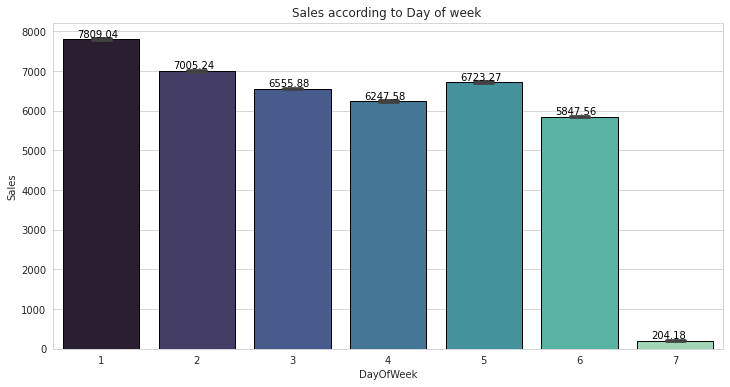

In [ ]:

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6)) #setting the figure size

#making a barplot of day of week vs sales.
sales = sns.barplot(data = df_rms, x = 'DayOfWeek',y = 'Sales', palette="mako", edgecolor = 'Black', ax = ax, capsize = .2)
ax.set(title = 'Sales according to Day of week ')

#to get the values of the bars 
for p in sales.patches: #looping through the patches so that we can print values in the chart.
  sales.annotate(f'\n{round(p.get_height(),2)}', (p.get_x() + 0.15, p.get_height()), ha = 'left', va = 'bottom', color = 'Black', size = 10)

plt.show()

### <font color = "#20B2AA">**Observation:**


*   As sundays has the most store closed so it has the least number of sales
*   On the other hand mondays have the maximum number of sales
*   Despite having the maximum number of stores open still have  third least sales numbers.








###<font color = "#20B2AA">**Impact of Promo on sales**

Text(-0.25, 4406.050805160786, '\n4406.05')

Text(0.75, 7991.152045969903, '\n7991.15')

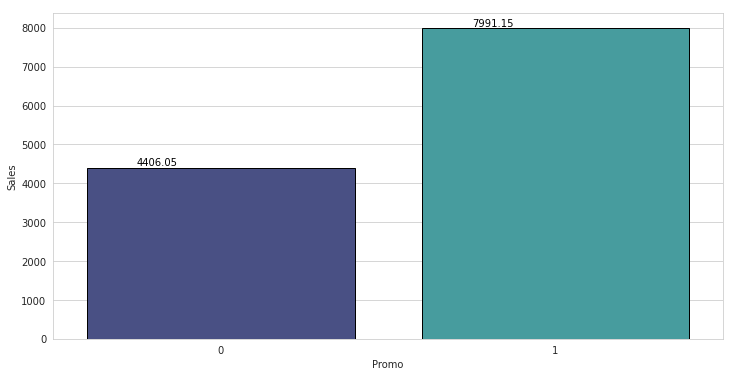

In [ ]:
#Impact of promo on sales
fig,ax=plt.subplots(figsize=(12,6)) #setting the figure size
#get mean of sales value when promo is 0 and 1.
Promo_sales = pd.DataFrame(df_rms.groupby('Promo').agg({'Sales':'mean'})) 

#making a barplot of sales vs promo
promo = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'], palette = 'mako',  edgecolor = 'black')

#to get the values of the bars 
for p in promo.patches: #looping through the patches so that we can print values in the chart.
  promo.annotate(f'\n{round(p.get_height(),2)}', (p.get_x()+0.15, p.get_height()), ha = 'left', va = 'bottom', color = 'Black', size=10)

### <font color = "#20B2AA">**Observation:**

*   As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.

*   The Sales get almost increases by 100 % when promo takes place.

([<matplotlib.patches.Wedge at 0x7fd19249e6d0>,
 [Text(1.0159180704524655, -0.6386786939675845, 'Not-Affected'),
  Text(-0.9312582038409442, 0.5854555130656288, 'Affected')],
 [Text(0.5926188744306049, -0.37256257148109095, '82.1%'),
  Text(-0.5079590202768786, 0.31933937076307023, '17.9%')])

(-1.1045085311776077,
 1.1946791547298579,
 -1.1573233397609766,
 1.0528563411165743)

Text(0.5, 1.0, 'Sales Affected by Schoolholiday or Not ?')

[]

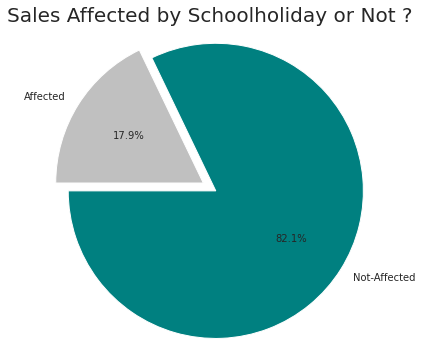

In [ ]:
#check the amount of sales affected by school holidays.

labels = 'Not-Affected' , 'Affected' #make labels of affected and not affected
sizes = df_rms['SchoolHoliday'].value_counts() #get value caunt of schoolh holidays
colors = ['Teal', 'silver'] #set the colors of the chart
explode = (0.1, 0.0) #set explode values

#make a pie chart of the persentage of affected and non affected values. 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal') #set axis
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20) #set title
plt.plot() 
fig=plt.gcf() #get the current figure for further operations
fig.set_size_inches(6,6) # set size of the plot
plt.show()

### <font color = "#20B2AA">**Observation:**




*   Only 18% Sales are affected during school holiday






(-1.1198767102389966,
 1.1532648769417027,
 -1.1660286425901127,
 1.1656077384745946)

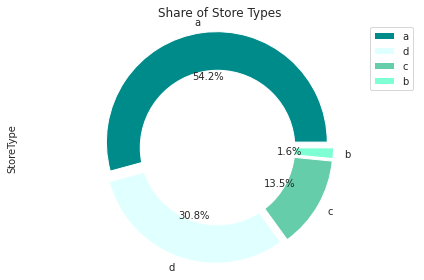

(-1.1198521337704173,
 1.1316560833923897,
 -1.1585424416648198,
 1.1650529391677167)

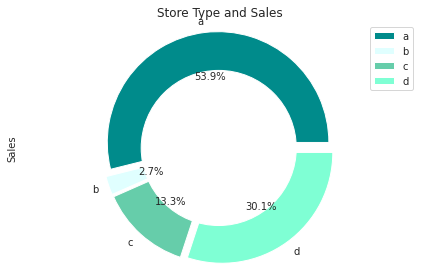

(-1.1175547535190975,
 1.1386091849186242,
 -1.1565641469178023,
 1.163858695983818)

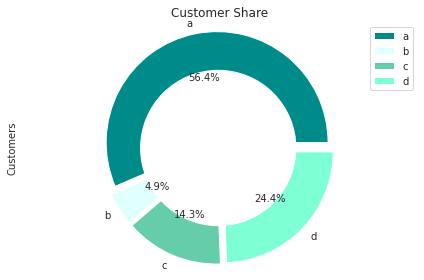

(-1.1524968431263414,
 1.104743633998287,
 -1.1656109621256827,
 1.1561682270552918)

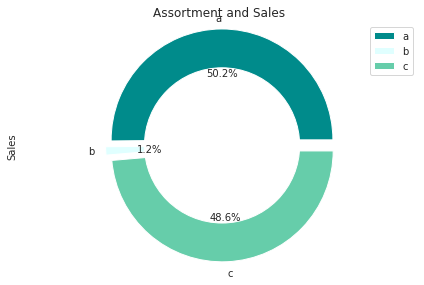

In [ ]:
#colors
colors = ['#008B8B','#E0FFFF','#66CDAA','#7FFFD4']
#explsion
explode = (0.05,0.05,0.05,0.05)

###############################################################################################################

#store types in all of the dataset
plt1 = df_rms["StoreType"].value_counts() #get count of values of store types

# make a pie plot the storetype column
plt1.plot.pie(title='Share of Store Types', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

###############################################################################################################

#store type vs sales
plt2 = df_rms.groupby("StoreType")["Sales"].sum()  #get sum of values of sales of the perticular store type

# make a piechart  of the made data
plt2.plot.pie(title='Store Type and Sales', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

###############################################################################################################

#customers and store type
plt3 = df_rms.groupby("StoreType")["Customers"].sum() #get sum of values of Customers of the perticular store type

# make a piechart  of the made data
plt3.plot.pie(title='Customer Share', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

###############################################################################################################

#Assortment and Sales
explode = (0.05,0.05,0.05)
plt4 = df_rms.groupby("Assortment")["Sales"].sum() #get sum of values of Assortment of the perticular store type

# make a piechart  of the made data
plt4.plot.pie(title='Assortment and Sales', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()


### <font color = "#20B2AA">**Observation:**

*  But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
*  Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.  
*   Maximum sales are from store a i.e. <font color = "#20B2AA">**54%**</font>
*   Minimum sales are from store d i.e. <font color = "#20B2AA">**1.5%**</font>



Text(-0.25, 70878.0, '\n70878.0')

Text(0.75, 346389.0, '\n346389.0')

Text(1.75, 113584.0, '\n113584.0')

Text(2.75, 6594.0, '\n6594.0')

Text(0.016666666666666663, 65962.0, '\n65962.0')

Text(1.0166666666666666, 205238.0, '\n205238.0')

Text(2.0166666666666666, 199328.0, '\n199328.0')

Text(3.0166666666666666, 942.0, '\n942.0')

Text(0.2833333333333333, nan, '\nnan')

Text(1.2833333333333332, nan, '\nnan')

Text(2.283333333333333, nan, '\nnan')

Text(3.283333333333333, 8294.0, '\n8294.0')

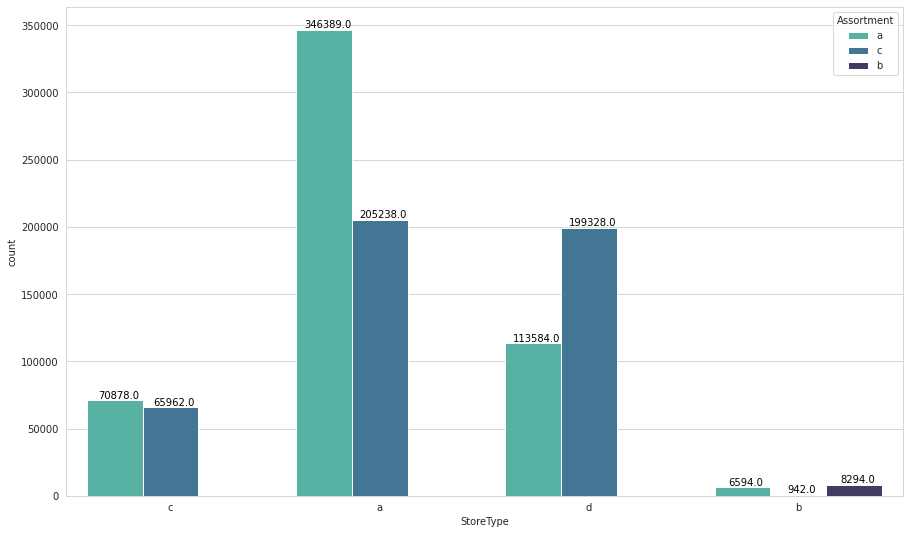

In [ ]:

#checking stores with their assortment type 
sns.set_style("whitegrid") #Setting style
fig, ax = plt.subplots() #make a subplot
fig.set_size_inches(15, 9) #set fig size

#make a count plot on storetype vs assortment
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df_rms, palette="mako_r")

#to get the values of the bars 
for p in store_type.patches: #looping through the patches so that we can print values in the chart.
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='bottom', color='Black', size=10)

Despite being scarce, store type B had the greatest average sales. The three types of assortments, especially level B, which is exclusively sold at type B stores, and the fact that the stores are open on Sundays are among the reasons.

##<font color = "#20B2AA"> **Now check the distribution of our each features**

Scatter plot for Customer vs Sales

In [ ]:
numeric_features = list(df_rms.describe().columns) #get list of all columns in df_rms dataframe.

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot between "Customers" and "Sales"')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sales')

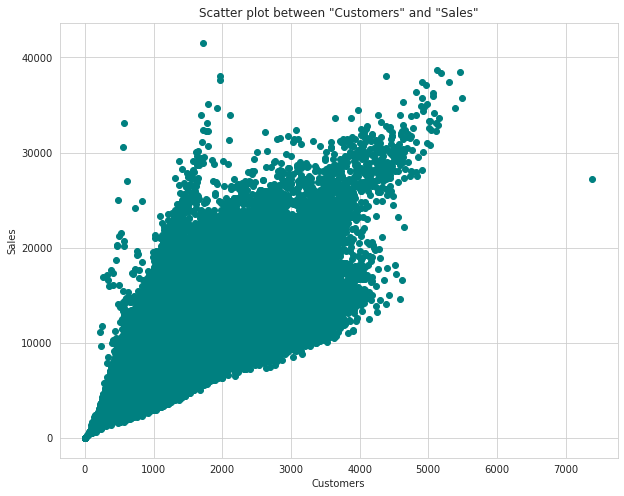

In [ ]:
#comparison between Customers and Sales
plt.figure(figsize = (10,8)) # set fig size
#make a scatter plot of customers vs sales
plt.scatter(x = df_rms['Customers'] ,y = df_rms['Sales'], color = "Teal")
plt.title('Scatter plot between "Customers" and "Sales"') #set title
#set x and y label
plt.xlabel('Customers')
plt.ylabel('Sales')

### <font color = "#20B2AA">**Observation:**

*   Positive relation between no. of Customers and Sales.
*   Linear regression with high varience & few outliers.



<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "CompetitionDistance" and "Sales"')

Text(0.5, 0, 'CompetitionDistance')

Text(0, 0.5, 'Sales')

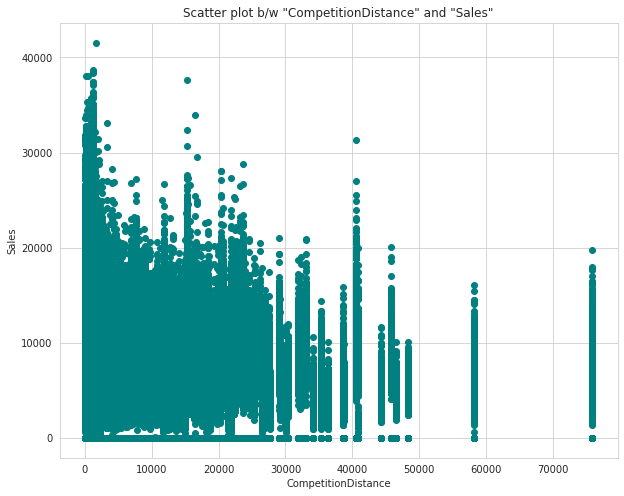

In [ ]:
#comparison between Competition Distance and Sales
plt.figure(figsize = (10,8)) #set fig size
#make a scatter plot of Competition Distance vs Sales
plt.scatter(df_rms['CompetitionDistance'],df_rms['Sales'], color = 'Teal')
plt.title('Scatter plot b/w "CompetitionDistance" and "Sales"') #set title
#set x and y label
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')

### <font color = "#20B2AA">**Observation:**


*   As the distance between the competition increases the sales decreases.
*   After certain distance (30,000) correlation between CompetitionDistance and Sales is very vague.

In [ ]:
df_rms[df_rms['CompetitionOpenSinceYear'] == 1900].shape[0]
print('---')
df_rms[df_rms['CompetitionOpenSinceYear'] == 1960].shape[0]

758

---


0

<Figure size 1152x648 with 0 Axes>

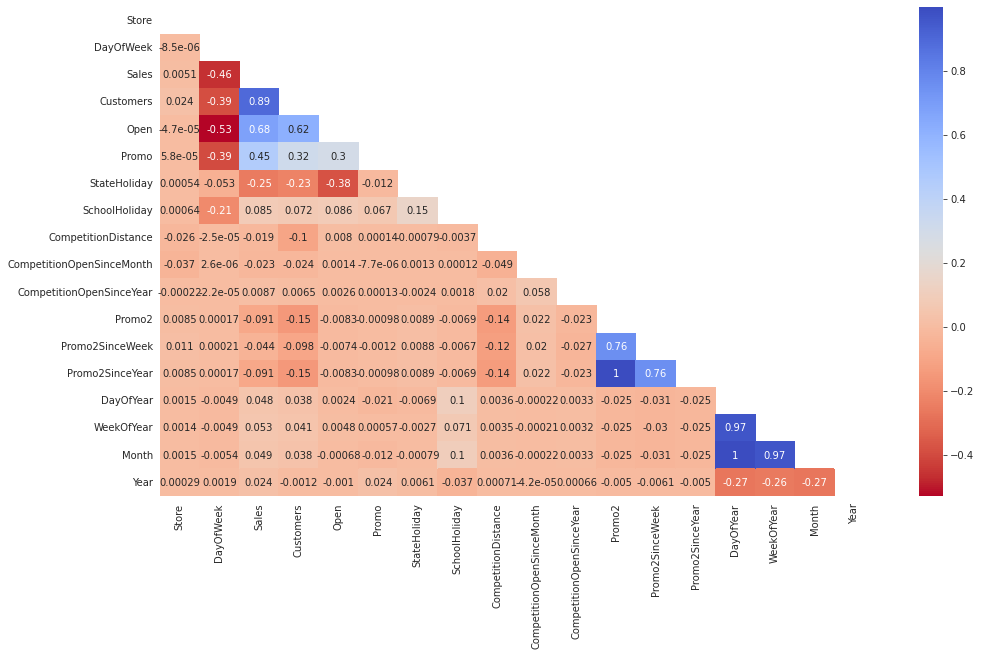

In [ ]:
plt.figure(figsize=(16,9)) #set fig size
mask = np.triu(np.ones_like(df_rms.corr())) #Return copy of array with upper part of the triangle

#plot a heatmapof the whole dataframe to check corelation
sns.heatmap(df_rms.corr(),annot= True, cmap='coolwarm_r', mask = mask)

### <font color="#20B2AA">**Possitive Correlation**</font>
Customers and sales has the most positive correlation of **0.84**<br>
Followed by open and Sales with correlation of **0.68**
### <font color="#20B2AA">**Negative Correlation**</font>
Open and Days of week has most negative correlation of **-0.53**

In [ ]:
#checking the dataframe head and info to make pair plot
df_rms.head()
df_rms.info()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# Select all object columns
object_columns = df_rms.select_dtypes(['object'])

# Drop the object columns from the DataFrame
df_s = df_rms.drop(object_columns, axis=1)


In [ ]:
df_s.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfYear,WeekOfYear,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,2008.0,0,0.0,0.0,212,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,570.0,11.0,2007.0,1,13.0,2010.0,212,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,14130.0,12.0,2006.0,1,14.0,2011.0,212,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,620.0,9.0,2009.0,0,0.0,0.0,212,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,29910.0,4.0,2015.0,0,0.0,0.0,212,31,7,2015


As the code takes time to execute we have put the photo of the plot with the code given below

In [ ]:
# #code block requires huge amount of time to execute therefore pasted the output of the block and commented the code.
# #pairplot for store dataset
# sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

# #plot the pair plot of all the required columns in the dataframe
# pp=sns.pairplot(df_s[['Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].sample(10000),hue='Sales')
# pp.fig.set_size_inches(15,15)

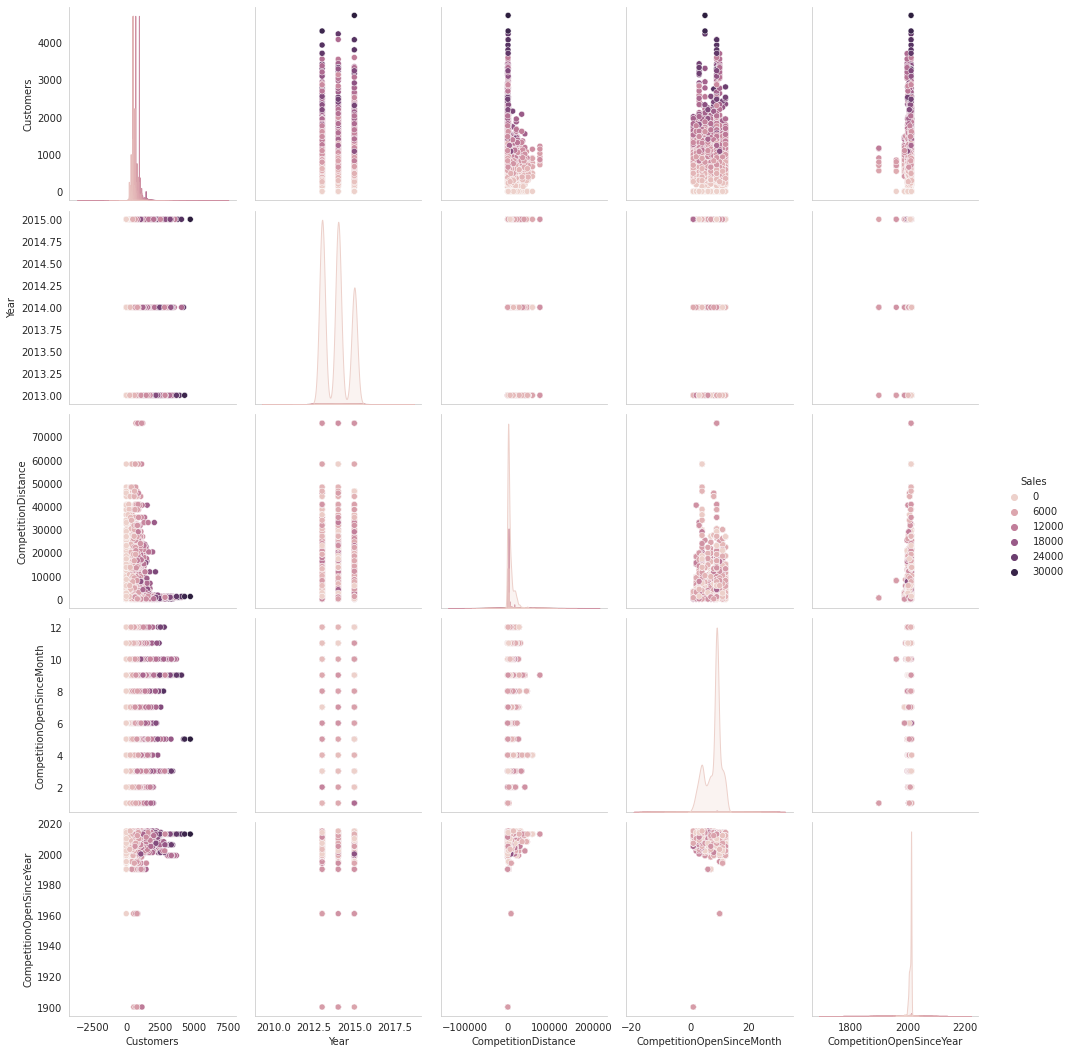

### <font color = "#20B2AA"><b>Creating Dummy variables</b>

So as we have catagorical values in StoreType and Assortment so we can use pd.getdummies to create dummies variable.

In [ ]:
3#Create a new dataframe with dummy variables of the object columns.
df_dummy = pd.get_dummies(data = df_rms, columns = ['DayOfWeek','StoreType',	'Assortment'], drop_first = True)

3

In [ ]:

print('------------------------------------Head---------------------------------------\n')
df_dummy.head() #get head of the dataframe

print('\n------------------------------------Info---------------------------------------\n')
df_dummy.info() #get info of the dataframe

print('\n------------------------------------Shape---------------------------------------\n')
#get shape of the dataframe
print(f'Rows: {df_dummy.shape[0]}, Columns: {df_dummy.shape[1]}')

------------------------------------Head---------------------------------------



,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,0
1,2,2015-07-31,6064,625,1,1,0,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
2,3,2015-07-31,8314,821,1,1,0,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
3,4,2015-07-31,13995,1498,1,1,0,1,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,1
4,5,2015-07-31,4822,559,1,1,0,1,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0



------------------------------------Info---------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   Date                       1017209 non-null  datetime64[ns]
 2   Sales                      1017209 non-null  int64         
 3   Customers                  1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSince

Remove features with high percentages of missing values

In [ ]:
# drop all the columns which are not required.
df_dummy.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','Date','PromoInterval'], axis = 1, inplace = True)

In [ ]:
df_dummy.head() # check the dataframe after droping few columns

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,0,1,1270.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,0
1,2,6064,625,1,1,0,1,570.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
2,3,8314,821,1,1,0,1,14130.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
3,4,13995,1498,1,1,0,1,620.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,1
4,5,4822,559,1,1,0,1,29910.0,0,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0


# <font color = "#20B2AA">**Feature Selection.**

As we have observed, our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

## <font color = "#20B2AA">**Check Multicolinerity**

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False)

    return(vif)

In [ ]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
8,Month,564.101464
6,DayOfYear,514.428005
7,WeekOfYear,61.181227
9,Year,24.985713
0,Customers,6.418616
15,DayOfWeek_7,3.115522
16,StoreType_b,2.385302
14,DayOfWeek_6,2.330946
1,Promo,2.283923
5,Promo2,2.152976


<font color = "#20B2AA">**Month: 564.1014**

Drop month column as it has highest value and check multicolinearity again

In [ ]:
#drop the varible
df_dummy.drop('Month', axis = 1, inplace = True)

In [ ]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
7,WeekOfYear,60.625836
6,DayOfYear,58.966210
8,Year,22.037074
0,Customers,6.416594
14,DayOfWeek_7,3.109048
15,StoreType_b,2.385233
13,DayOfWeek_6,2.327622
1,Promo,2.251992
5,Promo2,2.152973
18,Assortment_b,2.106965


<font color = "#20B2AA">**WeekOfYear:	60.6258**

Drop month column as it has highest value and check multicolinearity again

In [ ]:
#drop the varible
df_dummy.drop('WeekOfYear', axis = 1, inplace = True)

In [ ]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
7,Year,21.957509
0,Customers,6.416387
6,DayOfYear,3.606502
13,DayOfWeek_7,3.109021
14,StoreType_b,2.385227
12,DayOfWeek_6,2.327382
1,Promo,2.237995
5,Promo2,2.152973
17,Assortment_b,2.106965
18,Assortment_c,2.046535


<font color = "#20B2AA">**Year:	21.9575**

Drop month column as it has highest value and check multicolinearity again

In [ ]:
#drop the varible
df_dummy.drop('Year', axis = 1, inplace = True)

In [ ]:
#check multicolinerity of all the remaining variables
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,Customers,4.309367
6,DayOfYear,3.254634
13,StoreType_b,2.348660
1,Promo,2.162611
16,Assortment_b,2.105486
17,Assortment_c,2.030084
5,Promo2,1.909813
15,StoreType_d,1.679569
11,DayOfWeek_6,1.654362
10,DayOfWeek_5,1.631738


###<font color = "#20B2AA">**Now we have VIF values of all variablea under 5. Thus, these are the required variables.**

## <font color = "#20B2AA"><b>Splitting the Data into Training and Testing Sets</b>

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
# split the dummy dataset into train and test dataframe
df_train, df_test = train_test_split(df_dummy, train_size = 0.8, random_state = 100)

In [ ]:
#check the shape of the train and test models.
df_train.shape, df_test.shape

((813767, 21), (203442, 21))

In [ ]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)

y_train = df_train[['Sales']]

X_test = df_test.drop('Sales',axis=1)

y_test = df_test[['Sales']]

print(f'The shape of X_train is: {X_train.shape}\n')
print(f'The shape of y_train is: {y_train.shape}\n')
print(f'The shape of X_test is: {X_test.shape}\n')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (813767, 20)

The shape of y_train is: (813767, 1)

The shape of X_test is: (203442, 20)

The shape of y_test is: (203442, 1)


In [ ]:
X_train.head()

,Store,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
159073,744,709,1,0,0,0,1370.0,1,70,0,1,0,0,0,0,0,0,0,0,0
942545,41,353,1,1,0,0,1180.0,1,67,0,0,0,1,0,0,0,0,1,0,1
399384,376,879,1,0,0,1,160.0,0,191,0,0,1,0,0,0,0,0,0,0,0
513043,929,547,1,0,0,0,4820.0,0,88,0,0,0,0,1,0,0,0,0,0,1
30918,814,502,1,0,0,0,24530.0,0,185,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now Lets implement 3 models on our dataset:-
1. Linear Regression.
  * Lasso
  * Ridge
  * Elastic Net
2. Decision Tree
3. Random Forrest
  * Random Forrest with Optimization
4. XGBoost
  * XGBoost with Optimization.

## We will be using following Matrics to check our model performance :
 1. Mean Absolute Error (MAE)
 2. Mean Squared Error (MSE)
 3. Root Mean Square Error (RMSE)
 4. Mean Square Error (MSE)
 5. R Squared (R2)
 6. Adjusted R Squared

Making a function to calculate and print all the parameters to compare the performance of different Machine Learning Models.

In [ ]:
def values_cal(name,y_t, y_te): 
  l1 = list()
  
  #calculate MSE
  #train
  MSE_t= mean_squared_error(y_train, y_t)
  print("Train MSE:",MSE_t)
  l1.append(MSE_t)

  #test
  MSE_te= mean_squared_error(y_test, y_te)
  print("Test MSE:",MSE_te)
  l1.append(MSE_te)

  #calculate RMSE
  #Train
  RMSE_t=np.sqrt(MSE_t)
  print("\nTrain RMSE:",RMSE_t)
  l1.append(RMSE_t)
        
  #test
  RMSE_te=np.sqrt(MSE_te)
  print("Test RMSE:",RMSE_te)
  l1.append(RMSE_te)

  #calculate MAE
  #train
  MAE_t= mean_absolute_percentage_error(y_train, y_t)
  print("\nTrain MAPE:",MAE_t)
  l1.append(MAE_t)

  #test
  MAE_te= mean_absolute_percentage_error(y_test, y_te)
  print("Test MAPE:",MAE_te)
  l1.append(MAE_te)

  #calculate r2 and adjusted r2
  #train
  r2_t= r2_score(y_train, y_t)
  print("\nTrain R2:",r2_t)
  l1.append(r2_t)

  #test
  r2_te= r2_score(y_test, y_te)
  print(f"Test R2:",r2_t)
  l1.append(r2_te)

  rows = X_test.shape[0]
  cols = X_test.shape[1]
  #train
  Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
  print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
  l1.append(Adjusted_R2_t)
  
  #test
  Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
  print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
  l1.append(Adjusted_R2_te)

  #Plot the figure
  plt.figure(figsize=(15,10))
  plt.scatter(y_test,np.array(y_te), color = "Teal")
  # plt.plot(y_test,(np.array(y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

  # Actual vs Predicted
  plt.figure(figsize = [15,7])
  index = [i for i in range(0,len(y_test[0:250]),1)]
  plt.plot(index,y_test[0:250], color='#F4A460', linewidth=2.5, linestyle="-")   # plotting actual values of cnt variable            
  plt.plot(index,y_te[0:250], color='#20B2AA', linewidth=2.5, linestyle="-")    # plotting predicted values of cnt variable
  plt.suptitle('Actual vs Predicted', fontsize = 25)    # plotting heading
  plt.xlabel('Index', fontsize = 15)                      # xlabel
  plt.ylabel('cnt', fontsize = 15)                      # ylabel 
  plt.legend(y_test, y_te, labels = ['y_test', 'y_test_pred'], bbox_to_anchor = [1,1], fontsize = 12)   
  plt.show()

  rounded_values = [round(value, 4) for value in l1]
  return rounded_values

## <font color = "#20B2AA">**1. Linear Regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make a function to get summary of the model
def linear_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm)
    lr_model = lr.fit()
    print(lr_model.summary())

In [ ]:
# check the required parameters
linear_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 3.776e+05
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:25:29   Log-Likelihood:            -6.9255e+06
No. Observations:              813767   AIC:                         1.385e+07
Df Residuals:                  813746   BIC:                         1.385e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -483.7321     17.945    -26.956      0.0

In [ ]:
# change np array into dataframe
X_train = pd.DataFrame(X_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_LR = regressor.predict(X_train)
y_pred_test_LR = regressor.predict(X_test)


In [ ]:
print(regressor.coef_)  # Output: [1.]
print(regressor.intercept_)  # Output: 0.0

[[  -95.96463974 53431.84353381  1185.55333445  1245.88162745
   -205.89449114   111.34248735  1563.01961928   233.13062616
    251.64847676  -471.27141845  -617.39842556  -676.14491847
   -574.29739692  -200.11813361  -198.18172392 -3122.85330538
   -113.46240091   913.48881897 -4121.09970334   262.08364824]]
[-483.73206326]


Train MSE: 1444076.9594518945
Test MSE: 1460445.7451025206

Train RMSE: 1201.6975324314744
Test RMSE: 1208.4890339190176

Train MAPE: 3.965356421594898e+17
Test MAPE: 3.9479548310661504e+17

Train R2: 0.9027186149445506
Test R2: 0.9027186149445506

Train Adjusted R2: 0.9028073686735112
Test Adjusted R2: 0.9009558372058463



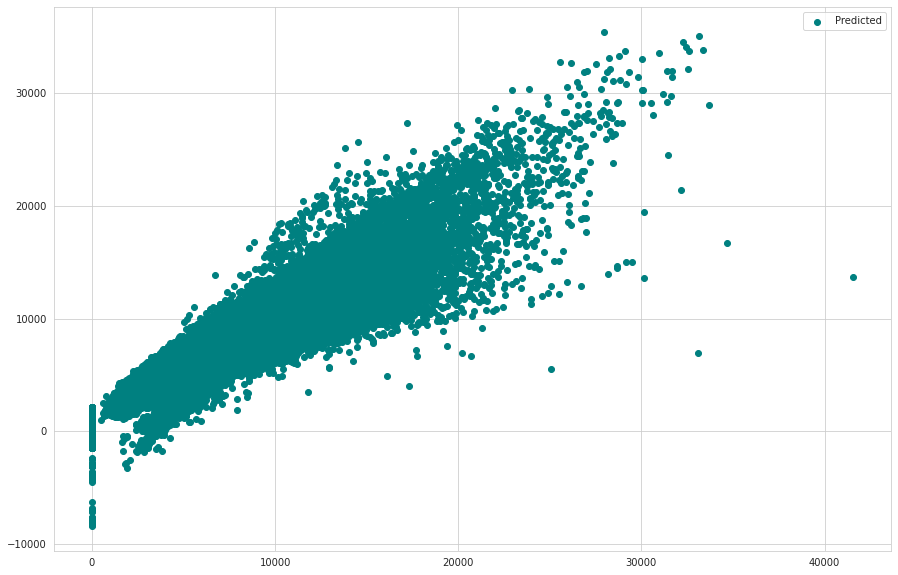

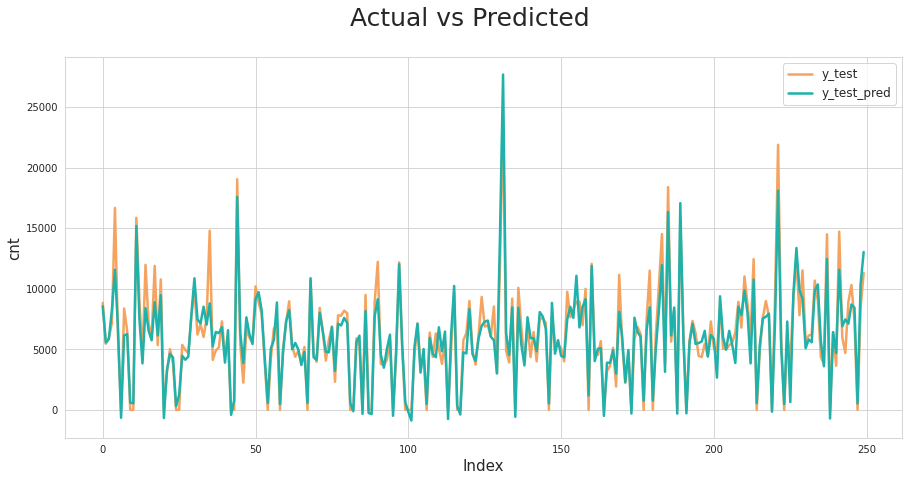

In [ ]:
lr = [] #make a empty list
# call the value_cal function to get all the required values of the modal
lr = values_cal(regressor, y_pred_train_LR,y_pred_test_LR)

## <font color = "#20B2AA">**2. LARS Lasso Regression**

In [ ]:
# Fitting LARS Lasso Regression to the Training set
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [ ]:
#check the score
las.score(X_train, y_train)

0.9026242907885189

In [ ]:
#get the X_train and X-test value
y_pred_train_las = las.predict(X_train)
y_pred_test_las = las.predict(X_test)

Train MSE: 1445477.138328537
Test MSE: 1461490.2813505563

Train RMSE: 1202.2799750176898
Test RMSE: 1208.921122882116

Train MAPE: 3.913935940440144e+17
Test MAPE: 3.896165527781138e+17

Train R2: 0.9026242907885189
Test R2: 0.9026242907885189

Train Adjusted R2: 0.902713035243692
Test Adjusted R2: 0.9008849287756394



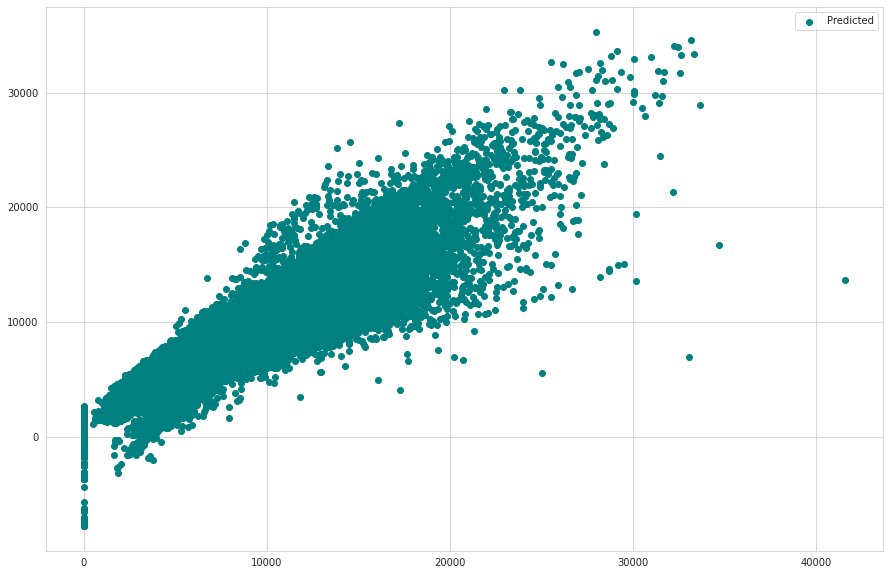

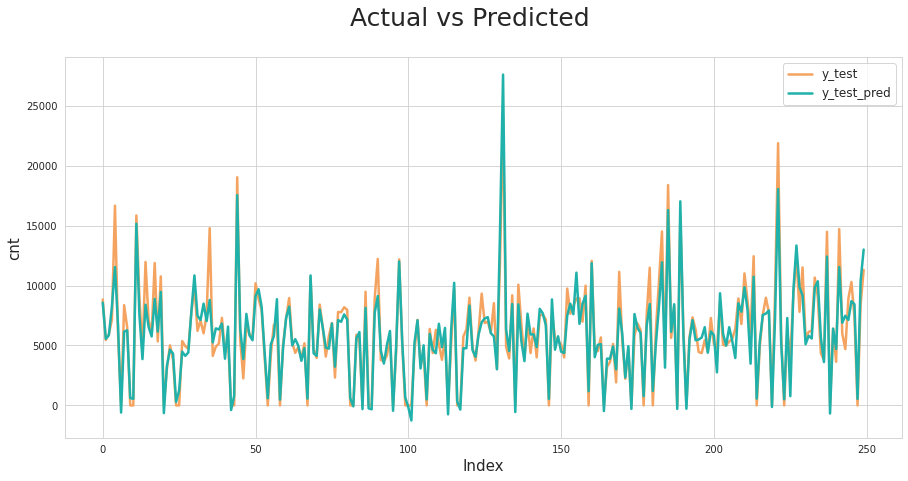

In [ ]:
lars = []
# call the value_cal function to get all the required values of the modal
lars = values_cal(las,y_pred_train_las,y_pred_test_las)

## <font color = "#20B2AA"> **3. Ridge Regression**

In [ ]:
# Fitting Ridge Regression to the Training set
ridge= Ridge(alpha=0.01)
ridge.fit(X_train,y_train) #FIT THE MODEL

Ridge(alpha=0.01)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.9027186149271342

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

Train MSE: 1444076.9597104297
Test MSE: 1460445.858842082

Train RMSE: 1201.6975325390451
Test RMSE: 1208.489080977599

Train MAPE: 3.965331905716957e+17
Test MAPE: 3.94793026559066e+17

Train R2: 0.9027186149271342
Test R2: 0.9027186149271342

Train Adjusted R2: 0.902807368656093
Test Adjusted R2: 0.9009558294846267



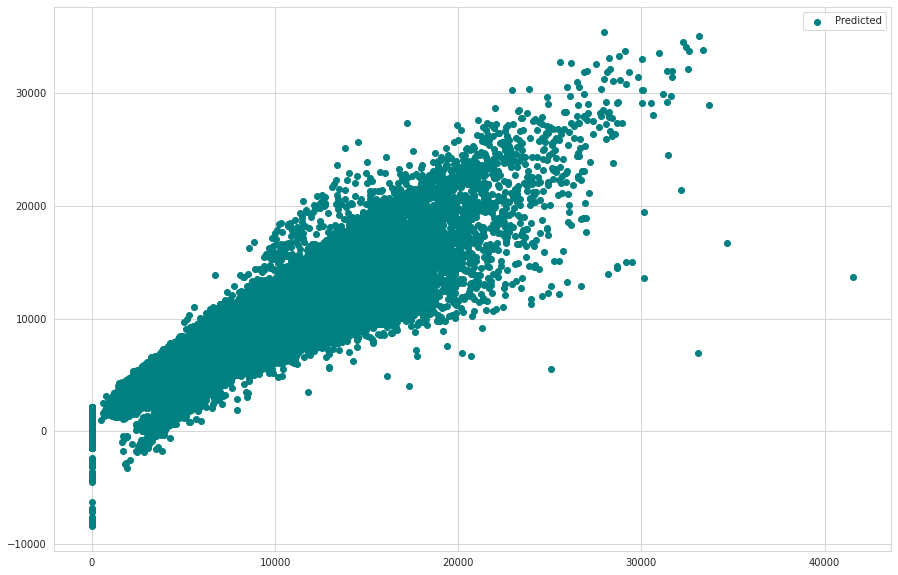

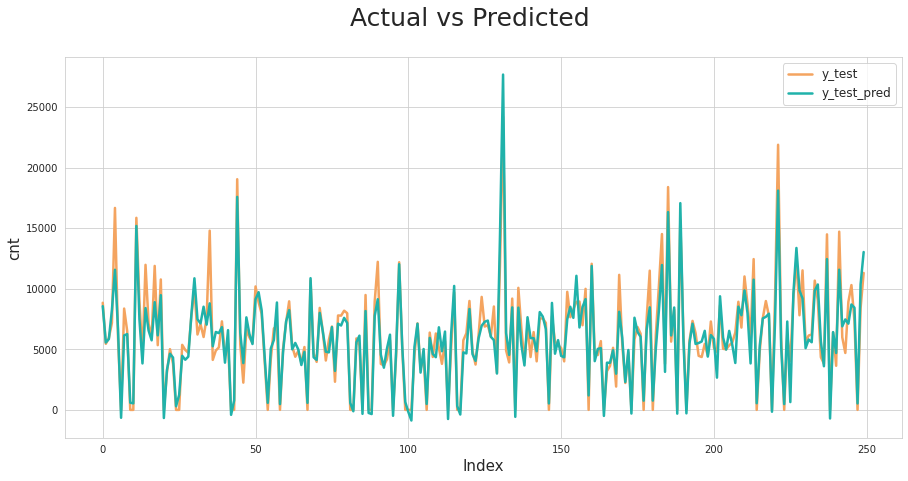

In [ ]:
ridgeR = [] #make a empty list
# call the value_cal function to get all the required values of the modal
ridgeR = values_cal(ridge, y_pred_train_ridge,y_pred_test_ridge)

## <font color = "#20B2AA">**4. Decision Tree Regression**

In [ ]:
# Fitting Decision Tree Regression to the Training set
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

###<font color = "#20B2AA">**Hyperparameter tuning**

In [ ]:
# # code block requires huge amount of time to execute therefore pasted the output of the block and commented the code.

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV( estimator = tree, param_distributions = params, verbose = True, cv = 10)
# #choosing 10 K-Folds makes sure  went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

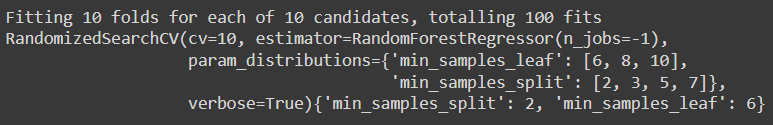

In [ ]:
# Fitting Decision Tree Regression to the Training set using values from hyperparameters
tree = DecisionTreeRegressor(min_samples_split = 2, min_samples_leaf = 6)
treereg = tree.fit(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_tree = treereg.predict(X_train)
y_pred_test_tree = treereg.predict(X_test)


Train MSE: 159982.4370571375
Test MSE: 328818.2755184645

Train RMSE: 399.9780457189338
Test RMSE: 573.4267830494705

Train MAPE: 817225993404.8306
Test MAPE: 0.05016874227932344

Train R2: 0.9892226567569005
Test R2: 0.9892226567569005

Train Adjusted R2: 0.989319915413259
Test Adjusted R2: 0.9777764622421964



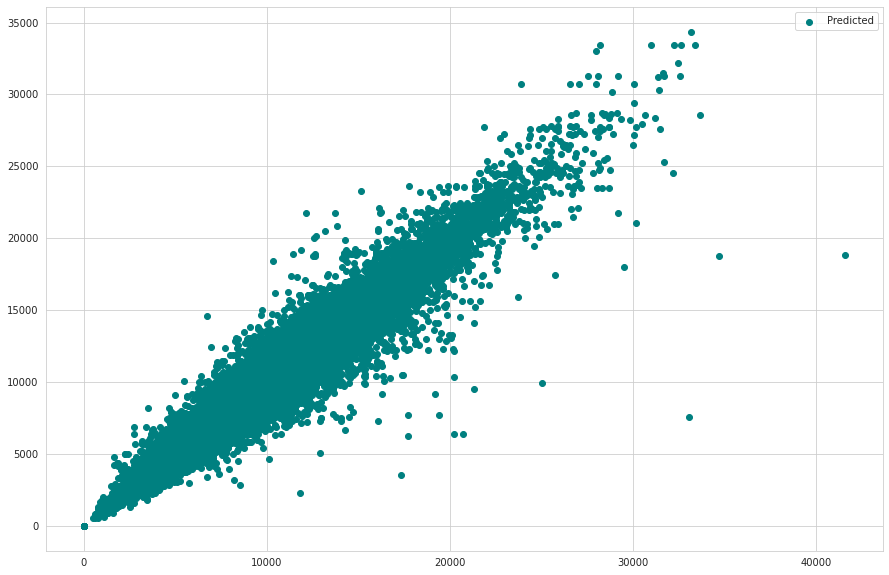

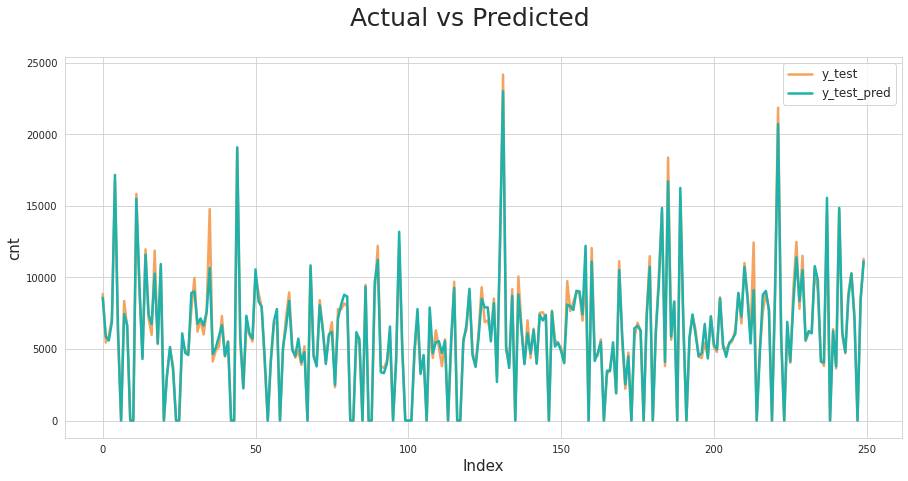

In [ ]:
Dtree = [] #make a empty list
# call the value_cal function to get all the required values of the modal
Dtree = values_cal(tree, y_pred_train_tree,y_pred_test_tree)

## <font color = "#20B2AA">**5. K-Nearest Neighbors Regression**

In [ ]:
#checking shape of train dataset
X_train.shape[0],y_train.shape[0]

(813767, 813767)

As KNN was taking a very long time for execution we decided it to run on only first 1,00,000 rows 

In [ ]:
#creating data with first 1,00,000 rows
X_t = X_train.iloc[0:100000]
y_t = y_train.iloc[0:100000]

In [ ]:
# Creating test data with 80:20 ratio
X_te = pd.DataFrame(X_test[0:20000])
y_te = y_test.iloc[0:20000]


In [ ]:
# Fitting K-Nearest Neighbors Regression to the Training set
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_t, y_t)

In [ ]:
#get the X_train and X-test value
y_pred_train_knn = knnreg.predict(X_t)
y_pred_test_knn = knnreg.predict(X_te)


Train MSE: 4043078.606301022
Test MSE: 4577365.825498334

Train RMSE: 2010.7408103236535
Test RMSE: 2139.4779329309135

Train MAPE: 5.090112714282186e+16
Test MAPE: 4.561678798765004e+16

Train R2: 0.7270977073754882
Test R2: 0.7270977073754882

Train Adjusted R2: 0.7278255693379243
Test Adjusted R2: 0.6975188400407631



<Figure size 1080x720 with 0 Axes>

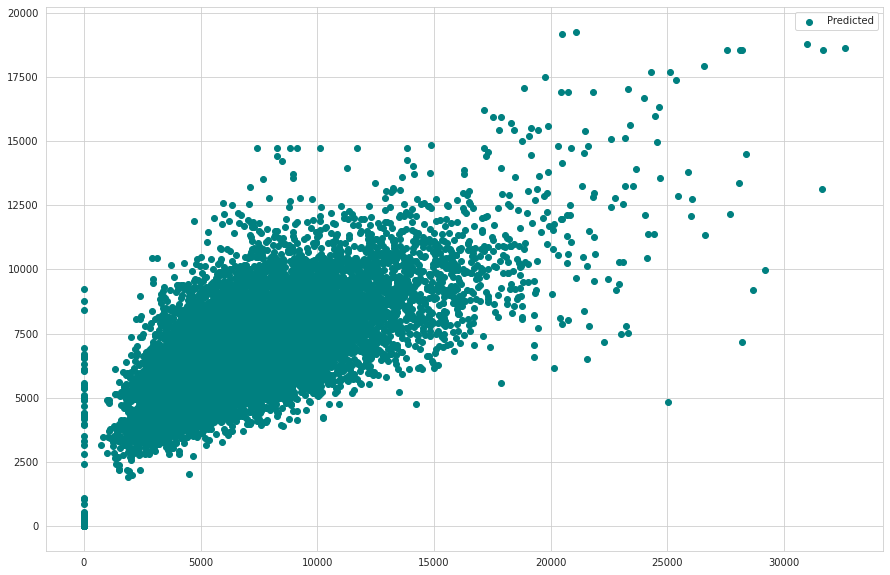

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0.98, 'Actual vs Predicted')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'cnt')

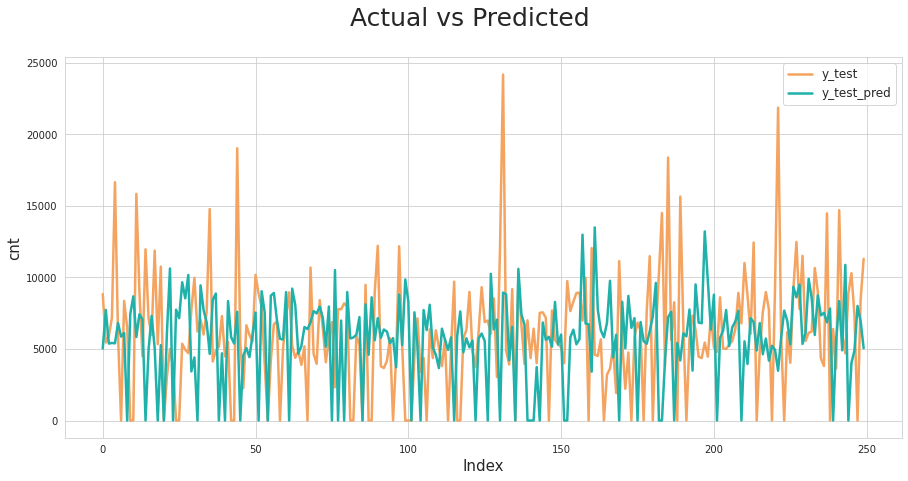

In [ ]:
l1 = list()

#calculate MSE
#train
MSE_t= mean_squared_error(y_t, y_pred_train_knn)
print("Train MSE:",MSE_t)
l1.append(MSE_t)

#test
MSE_te= mean_squared_error(y_te, y_pred_test_knn)
print("Test MSE:",MSE_te)
l1.append(MSE_te)

#calculate RMSE
#Train
RMSE_t=np.sqrt(MSE_t)
print("\nTrain RMSE:",RMSE_t)
l1.append(RMSE_t)
      
#test
RMSE_te=np.sqrt(MSE_te)
print("Test RMSE:",RMSE_te)
l1.append(RMSE_te)

#calculate MAPE
#train
MAE_t= mean_absolute_percentage_error(y_t, y_pred_train_knn)
print("\nTrain MAPE:",MAE_t)
l1.append(MAE_t)

#test
MAE_te= mean_absolute_percentage_error(y_te, y_pred_test_knn)
print("Test MAPE:",MAE_te)
l1.append(MAE_te)

#calculate r2 and adjusted r2
#train
r2_t= r2_score(y_t, y_pred_train_knn)
print("\nTrain R2:",r2_t)
l1.append(r2_t)

#test
r2_te= r2_score(y_te, y_pred_test_knn)
print(f"Test R2:",r2_t)
l1.append(r2_te)

rows = X_te.shape[0]
cols = X_te.shape[1]

#train
Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
l1.append(Adjusted_R2_t)

#test
Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
l1.append(Adjusted_R2_te)

#Plot the figure
plt.figure(figsize=(15,10))
plt.scatter(y_te,np.array(y_pred_test_knn), color = "Teal")
# plt.plot(y_test,(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Actual vs Predicted
plt.figure(figsize = [15,7])
index = [i for i in range(0,len(y_test[0:250]),1)]
plt.plot(index,y_test[0:250], color='#F4A460', linewidth=2.5, linestyle="-")   # plotting actual values of cnt variable            
plt.plot(index,y_pred_train_knn[0:250], color='#20B2AA', linewidth=2.5, linestyle="-")    # plotting predicted values of cnt variable
plt.suptitle('Actual vs Predicted', fontsize = 25)    # plotting heading
plt.xlabel('Index', fontsize = 15)                      # xlabel
plt.ylabel('cnt', fontsize = 15)                      # ylabel 
plt.legend(y_test, y_pred_train_knn, labels = ['y_test', 'y_test_pred'], bbox_to_anchor = [1,1], fontsize = 12)   
plt.show()

k_nn = [] #make a empty list
# call the value_cal function to get all the required values of the modal
k_nn = [round(value, 4) for value in l1]

## <font color = "#20B2AA">**6. Random Forest**

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)
rf_reg = rf_model.fit(X_train,y_train)

###<font color = "#20B2AA">**Hyperparameter tuning**

In [ ]:
# # code block requires huge amount of time to execute therefore pasted the output of the block and commented the code.

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV( estimator = rf_model, param_distributions = params, verbose = True, cv = 10)
# #choosing 10 K-Folds makes sure  went through all of the data and didn't miss any pattern.

# grid.fit(X_train[0:10000], y_train[0:10000])
# grid.best_params_

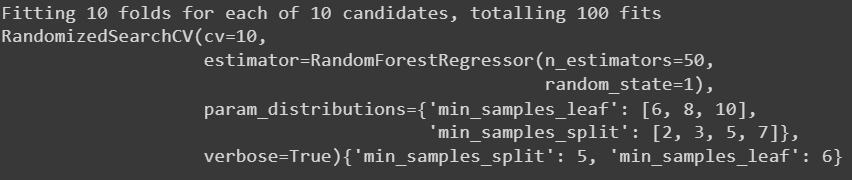

In [ ]:
# Fitting Random Forest Regression to the Training set
rf_model = RandomForestRegressor(min_samples_split = 5, min_samples_leaf = 6)
rf_reg = rf_model.fit(X_train, y_train)

In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_reg.predict(X_train)
y_pred_test_r = rf_reg.predict(X_test)

Train MSE: 153437.76389064643
Test MSE: 247519.20875191243

Train RMSE: 391.71132724322183
Test RMSE: 497.51302370079964

Train MAPE: 2697133377248.0312
Test MAPE: 1612553678416.5498

Train R2: 0.9896635438344238
Test R2: 0.9896635438344238

Train Adjusted R2: 0.9897608458380354
Test Adjusted R2: 0.9832954561617891



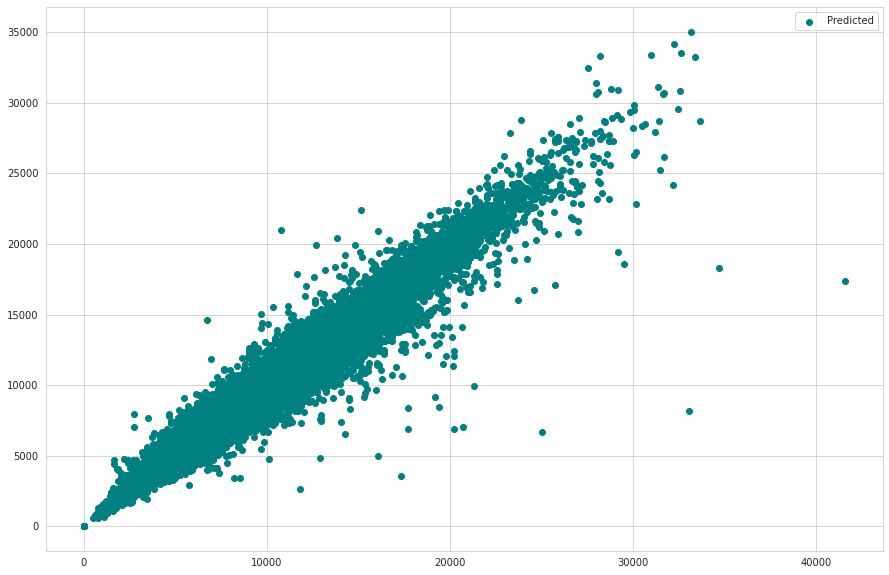

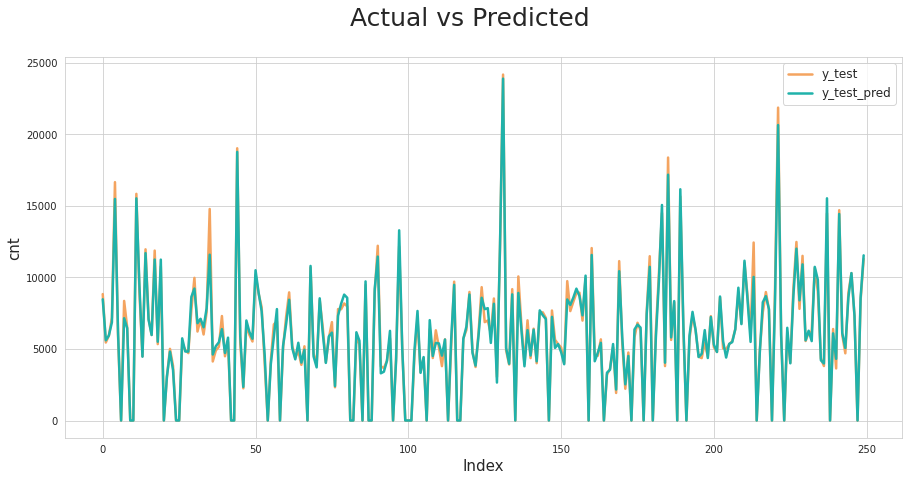

In [ ]:
rf = [] #make a empty list
# call the value_cal function to get all the required values of the modal
rf = values_cal(rf_model, y_pred_train_r,y_pred_test_r)

In [ ]:
# Create a list of old column names
old_names = X_train.columns

# Create a list of new column names
new_names = df_train.drop('Sales',axis=1).columns

# Create a dictionary mapping old names to new names
name_mapping = dict(zip(old_names, new_names))

# Change the column names using the rename method
X = X_train.rename(columns=name_mapping)

In [ ]:
X.head()

,Store,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,0.666966,0.095966,1.0,0.0,0.0,0.0,0.017801,1.0,0.189560,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035907,0.047780,1.0,1.0,0.0,0.0,0.015295,1.0,0.181319,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.336625,0.118977,1.0,0.0,0.0,1.0,0.001846,0.0,0.521978,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833034,0.074039,1.0,0.0,0.0,0.0,0.063291,0.0,0.239011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.729803,0.067948,1.0,0.0,0.0,0.0,0.323180,0.0,0.505495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#cheking feature importance
rf_model.feature_importances_

array([2.30060731e-02, 8.70152792e-01, 9.55353968e-10, 1.76806697e-02,
       8.37315188e-05, 2.36967048e-04, 3.33438287e-02, 4.28482947e-03,
       3.75881849e-03, 2.98701069e-04, 2.45477388e-04, 3.96338494e-04,
       6.58096693e-04, 9.68784586e-04, 1.65671593e-04, 6.48090503e-03,
       1.78057870e-03, 2.37808893e-02, 1.00347080e-02, 2.64213823e-03])

<Figure size 720x1440 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x7fd194729a00>,
 [Text(0, 0, 'Open'),
  Text(0, 0, 'StateHoliday'),
  Text(0, 0, 'DayOfWeek_7'),
  Text(0, 0, 'SchoolHoliday'),
  Text(0, 0, 'DayOfWeek_3'),
  Text(0, 0, 'DayOfWeek_2'),
  Text(0, 0, 'DayOfWeek_4'),
  Text(0, 0, 'DayOfWeek_5'),
  Text(0, 0, 'DayOfWeek_6'),
  Text(0, 0, 'StoreType_c'),
  Text(0, 0, 'Assortment_c'),
  Text(0, 0, 'DayOfYear'),
  Text(0, 0, 'Promo2'),
  Text(0, 0, 'StoreType_b'),
  Text(0, 0, 'Assortment_b'),
  Text(0, 0, 'Promo'),
  Text(0, 0, 'Store'),
  Text(0, 0, 'StoreType_d'),
  Text(0, 0, 'CompetitionDistance'),
  Text(0, 0, 'Customers')])

Text(0.5, 0, 'Relative Importance')

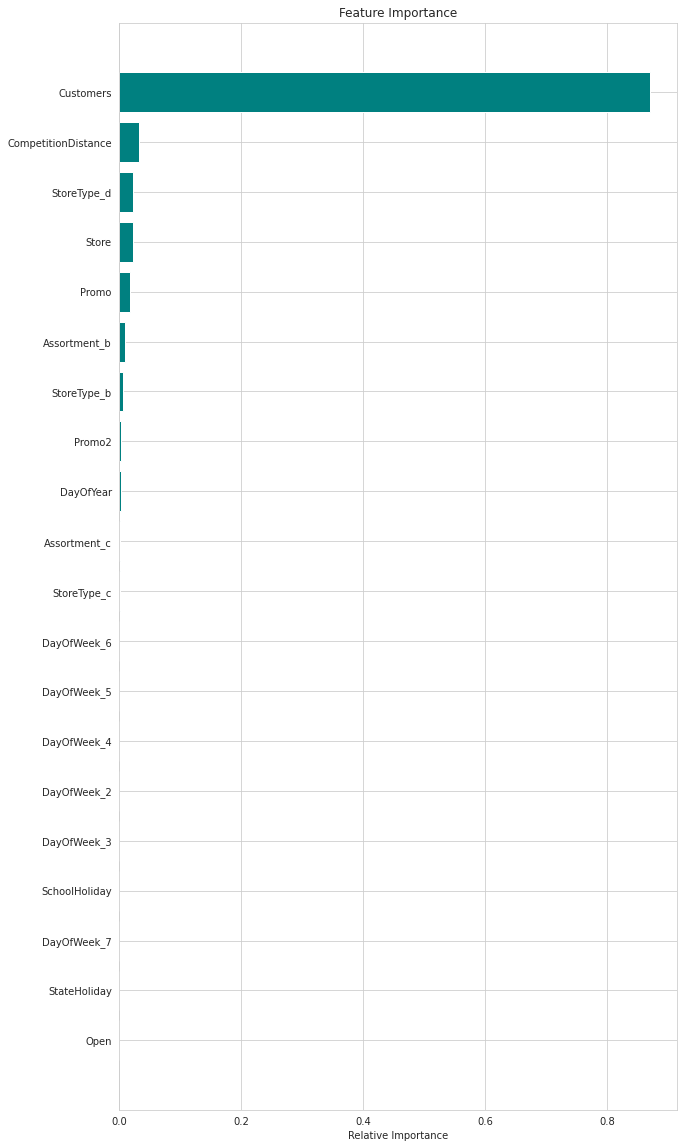

In [ ]:
# Random forest
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')

# ploting a horizontal bar grapg of all the features
plt.barh(range(len(indices)), importances[indices], color='Teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## The Important Features are:-


1.   Customers
2.   CompeitionDistance
3.   StoreType_d
4.   Store
5.   Promo



##<font color = "#20B2AA"> **7. XGBoost**

In [ ]:
# Fitting XGBoost to the Training set
xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)
xgb.fit(X_train,y_train)

[11:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(criterion='squared_error', n_estimators=50, random_state=1)

In [ ]:
# making dataframe of x test as it was an np array
X_test = pd.DataFrame(X_test)

In [ ]:
# Making predictions on train and test data
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

Train MSE: 1147716.426584182
Test MSE: 1164175.3010291695

Train RMSE: 1071.3152787971346
Test RMSE: 1078.9695551910486

Train MAPE: 1.1149464387599122e+17
Test MAPE: 1.1025178733283864e+17

Train R2: 0.9226831763375146
Test R2: 0.9226831763375146

Train Adjusted R2: 0.922773892947534
Test Adjusted R2: 0.9210681809808497



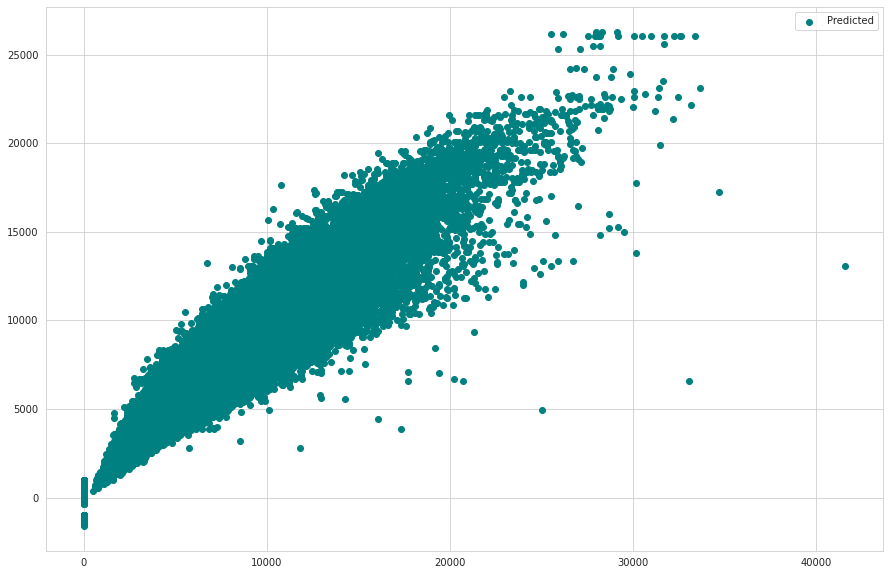

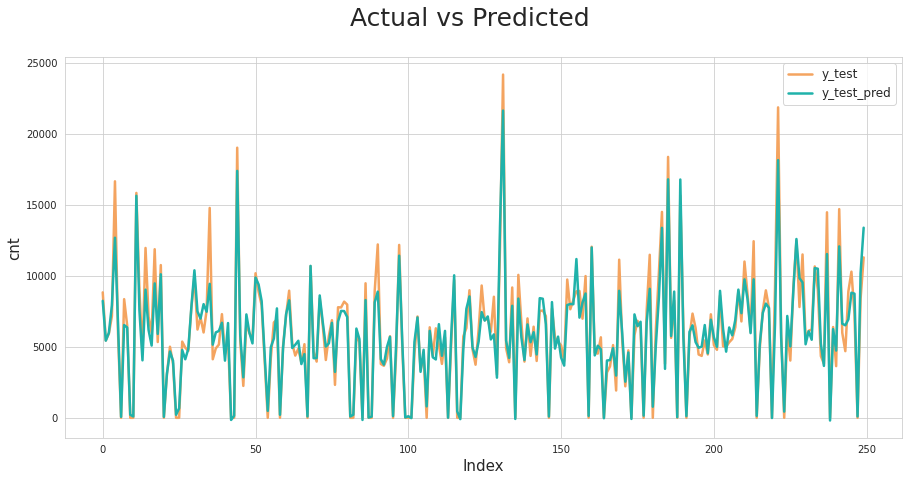

In [ ]:
xgboost = [] #make a empty list
# call the value_cal function to get all the required values of the modal
xgboost = values_cal(xgb, y_pred_train_xgb,y_pred_test_xgb)

<Figure size 720x1440 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x7fd18028d910>,
 [Text(0, 0, 'DayOfWeek_2'),
  Text(0, 0, 'StoreType_c'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'DayOfWeek_7'),
  Text(0, 0, 'StateHoliday'),
  Text(0, 0, 'SchoolHoliday'),
  Text(0, 0, 'DayOfWeek_3'),
  Text(0, 0, 'Store'),
  Text(0, 0, 'DayOfWeek_6'),
  Text(0, 0, 'Promo2'),
  Text(0, 0, 'DayOfWeek_4'),
  Text(0, 0, 'DayOfYear'),
  Text(0, 0, 'StoreType_b'),
  Text(0, 0, 'Assortment_c'),
  Text(0, 0, 'DayOfWeek_5'),
  Text(0, 0, 'CompetitionDistance'),
  Text(0, 0, 'Assortment_b'),
  Text(0, 0, 'StoreType_d'),
  Text(0, 0, 'Promo'),
  Text(0, 0, 'Customers')])

Text(0.5, 0, 'Relative Importance')

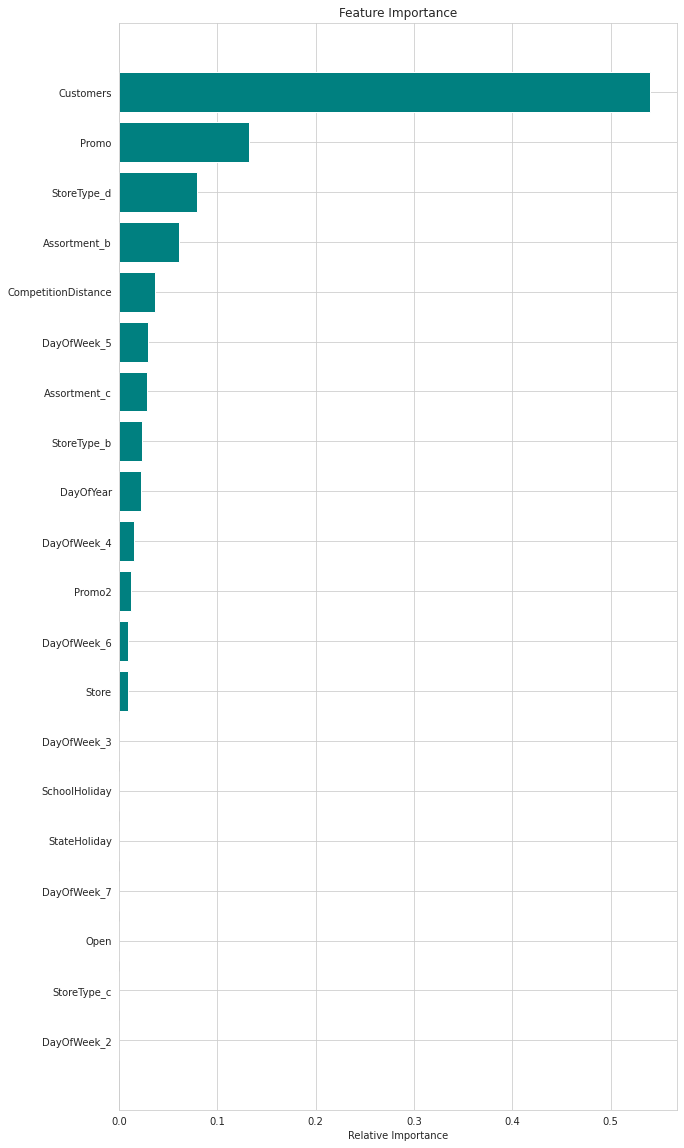

In [ ]:
# XGBoost
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')

# ploting a horizontal bar grapg of all the features

plt.barh(range(len(indices)), importances[indices], color='Teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

##The Important Features are:-


1.   Customers
2.   Promo
3.   StoreType_d
4.   Assortment_b
5.   CompetitionDistance



## <font color = "#20B2AA"> **Result**

In [ ]:
#  creating a new dataframe to compare all the values of every model
df_result = pd.DataFrame(columns = ['Modal Name','Train MSE','Test MSE','Train RMSE','Test RMSE','Train MAPE','Test MAPE','Train R2','Test R2','Train Adjusted R2','Test Adjusted R2'])

In [ ]:
#inserting the model name at the start of each respective list.

# Linear Regression
lr.insert(0,'Linear Regression')

# LARS Lasso
lars.insert(0,'LARS Lasso')

# Ridge
ridgeR.insert(0, 'Ridge')

# Desision Tree
Dtree.insert(0,'Desision Tree')

# K-Nearest
k_nn.insert(0, 'K-Nearest')

# Random Forest
rf.insert(0,'Random Forest')

# XGBoost
xgboost.insert(0,'XGBoost')

In [ ]:
# make a list of all modal list names 
models = [lr,lars,ridgeR,Dtree,k_nn,rf,xgboost]

# loop it through the list and range of list 
for i,j in zip(models,range(7)):

  df_result.loc[j] = i #add value to the row of every list on iteration

In [ ]:
#  check the result table
df_result

,Modal Name,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAPE,Test MAPE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,Linear Regression,1.444077e+06,1.460446e+06,1201.6975,1208.4890,3.965356e+17,3.947955e+17,0.9027,0.9009,0.9028,0.9010
1,LARS Lasso,1.445477e+06,1.461490e+06,1202.2800,1208.9211,3.913936e+17,3.896166e+17,0.9026,0.9008,0.9027,0.9009
2,Ridge,1.444077e+06,1.460446e+06,1201.6975,1208.4891,3.965332e+17,3.947930e+17,0.9027,0.9009,0.9028,0.9010
3,Desision Tree,1.599824e+05,3.288183e+05,399.9780,573.4268,8.172260e+11,5.020000e-02,0.9892,0.9777,0.9893,0.9778
4,K-Nearest,4.043079e+06,4.577366e+06,2010.7408,2139.4779,5.090113e+16,4.561679e+16,0.7271,0.6968,0.7278,0.6975
5,Random Forest,1.534378e+05,2.475192e+05,391.7113,497.5130,2.697133e+12,1.612554e+12,0.9897,0.9832,0.9898,0.9833
6,XGBoost,1.147716e+06,1.164175e+06,1071.3153,1078.9696,1.114946e+17,1.102518e+17,0.9227,0.9210,0.9228,0.9211


For regression models the model score is same as the R-squared value.

R-squared is a goodness-of-fit measure for linear regression models.

[Text(0.5, 1.0, 'Score of all the models performed')]

Text(-0.25, 0.9009, '\n0.9009')

Text(0.75, 0.9008, '\n0.9008')

Text(1.75, 0.9009, '\n0.9009')

Text(2.75, 0.9777, '\n0.9777')

Text(3.75, 0.6968, '\n0.6968')

Text(4.75, 0.9832, '\n0.9832')

Text(5.75, 0.921, '\n0.921')

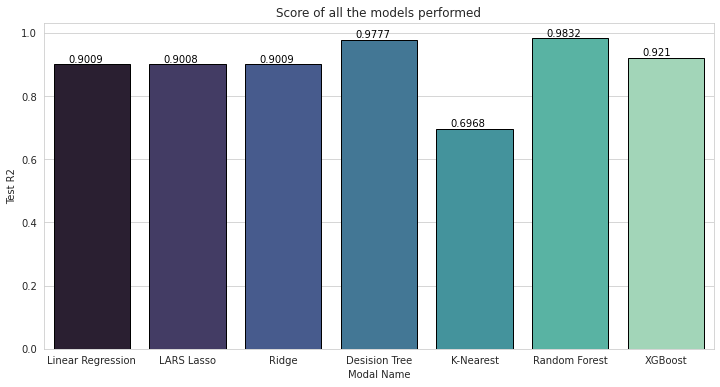

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6)) #setting the figure size

#making a barplot of Modal Name vs Score.
score = sns.barplot(data = df_result, x = 'Modal Name',y = 'Test R2', palette="mako", edgecolor = 'Black', ax = ax, capsize = .2)
ax.set(title = 'Score of all the models performed')

#to get the values of the bars 
for p in score.patches: #looping through the patches so that we can print values in the chart.
  score.annotate(f'\n{round(p.get_height(),4)}', (p.get_x() + 0.15, p.get_height()), ha = 'left', va = 'bottom', color = 'Black', size = 10)

plt.show()

## <font color = "#20B2AA"> **Conclusion and Recomendations:**

Conclusion:-

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

Following are some significant findings from the analysis:

*   The largest sales among the other months are in the month of December.This validates the hypothesis about this feature
*   Due to the fact that stores are often closed on Sundays, which had the lowest sales during the week, there were more sales on Monday. This validates the hypothesis about this feature.
*   Stores that participated in the promotion saw a roughly 100% increase in sales.This validates the hypothesis about this feature.
*   The type of store has a significant impact on how and when stores open. Despite being scarce, store type B had the greatest average sales. The three types of assortments, especially level B, which is exclusively sold at type B stores, and the fact that the stores are open on Sundays are among the reasons. Other than for renovations or other reasons, none of the Type "b" stores ever closed.This validates the hypothesis about this feature.
*   Game theory and the Nash Equilibrium are validated by the fact that most stores have competition within a distance of 0 to 10 km and had more sales than stores farther away.This validates the hypothesis about this feature.
*   We can see that the majority of stores are closed on state holidays. However, it's noteworthy to notice that more stores were open during school breaks than during state holidays.
*   The dataset's outliers displayed justified behaviour. The anomalies either belonged to store type B or were running promotions that boosted sales.
*   The XGBoost Model performs well and provides 0.92 R-Squared on the test set. All trends and patterns that could be caught by these models without overfitting were done, and the model reached its maximum level of performance.










Recomendations:-
*   It is important to encourage more stores to run promotions.
*   It might be possible to have more stores of type B. They have the highest average sales despite having the fewest stores.
*   Because there is a seasonal component, retailers should be urged to advertise and capitalise on the holidays.





In [ ]:
t2 = time.time()
print(f"Execution time = {round((t2-t1)/60,2)} mins" )

Execution time = 21.69 mins
